<a href="https://colab.research.google.com/github/aminul01-g/pytorch/blob/main/08_Improve_ANN_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
# Set Random Seeds For Reproducibility
torch.manual_seed(42)

In [4]:
# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print (f"Using Divice: {device}")

Using Divice: cuda


In [5]:
df = pd.read_csv('/content/fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(60000, 785)

# Grid of Images

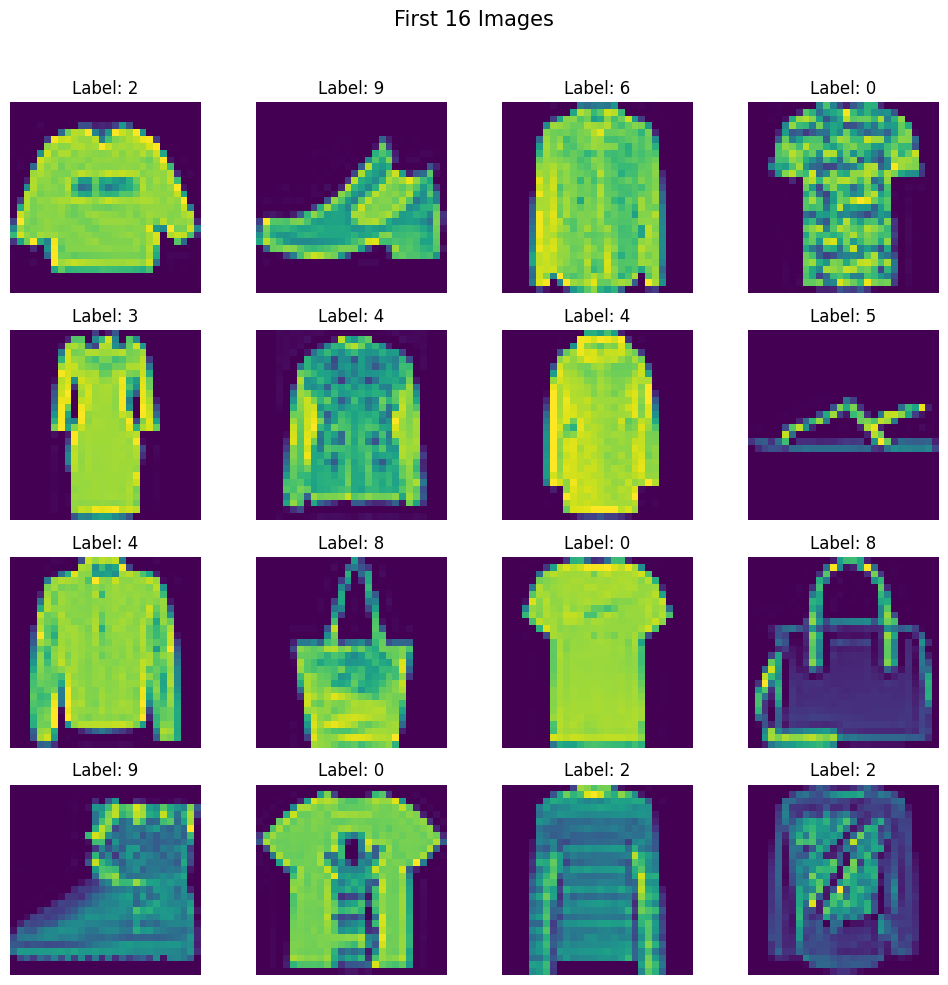

In [7]:
# Create a 4x4 grid of images

fig, axes = plt.subplots(nrows=4, ncols=4, figsize = (10, 10))
fig.suptitle("First 16 Images", fontsize=15)

# Plot the first 16 imges from the dataset

for i, ax in enumerate(axes.flat):
  img = df.iloc[i,1:].values.reshape(28,28) # Reshape to 28 x 28
  ax.imshow(img) # Display in grayscale
  ax.axis('off')  # Remove axis for a cleaner look
  ax.set_title(f"Label: {df.iloc[i,0]}") # Show the label

plt.tight_layout(rect=[0,0,1,.96]) # Adjust layout to fit the title
plt.show()

# Train Test Split

In [8]:
x = df.iloc[:,1:].values
y = df.iloc[:, 0].values

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale

In [10]:
x_train = x_train/255.0
x_test = x_test/255.0

In [29]:
x_train.shape

(48000, 784)

# Dataset

In [19]:
class customDataset(Dataset):

  def __init__ (self, features, labels):

    # Convert to Pythorch
    self.features = torch.tensor(features, dtype = torch.float32)
    self.labels = torch.tensor(labels, dtype = torch.long)

  def __len__(self):

    return len(self.features)

  def __getitem__(self, index):

    return self.features[index], self.labels[index]

In [20]:
train_dataset = customDataset(x_train, y_train)
test_dataset = customDataset(x_test, y_test)

# DataLoad

In [25]:
train_loader = DataLoader(train_dataset, batch_size = 68, shuffle = True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=68, shuffle=True, pin_memory=True)

In [26]:
len(train_loader)

706

# Create NN

In [27]:
class myNN(nn.Module):

  def __init__(self, num_features):

    super(). __init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64,10)
    )

  def forward(self, x):

    return self.model(x)

In [28]:
learning_rate = 0.1
epochs = 100

# Create Model

In [33]:
model  = myNN(x_train.shape[1]) # We passes the input features No.
model = model.to(device)

# Loss Function

criterion = nn.CrossEntropyLoss()

# Optimizer

optimizer = optim.SGD(model.parameters(), lr  = learning_rate)

# Train Model

In [35]:
# Traning Loop

for epoch in range(epochs):
  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # Move data to GPU
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # Forward pass

    outputs = model(batch_features)

    # Calculate Loss
    loss = criterion(outputs, batch_labels)
    total_epoch_loss += loss.item()

    # Back Pass
    optimizer.zero_grad()
    loss.backward()

    # Update Grad
    optimizer.step()

  avg_loss = total_epoch_loss / len(train_loader)
  print(f"Epoch: {epoch + 1}, Loss: {avg_loss:.4f}")

Epoch: 1, Loss: 0.7633
Epoch: 2, Loss: 0.4756
Epoch: 3, Loss: 0.4200
Epoch: 4, Loss: 0.3869
Epoch: 5, Loss: 0.3643
Epoch: 6, Loss: 0.3450
Epoch: 7, Loss: 0.3292
Epoch: 8, Loss: 0.3188
Epoch: 9, Loss: 0.3075
Epoch: 10, Loss: 0.2973
Epoch: 11, Loss: 0.2880
Epoch: 12, Loss: 0.2808
Epoch: 13, Loss: 0.2709
Epoch: 14, Loss: 0.2647
Epoch: 15, Loss: 0.2559
Epoch: 16, Loss: 0.2505
Epoch: 17, Loss: 0.2464
Epoch: 18, Loss: 0.2389
Epoch: 19, Loss: 0.2349
Epoch: 20, Loss: 0.2298
Epoch: 21, Loss: 0.2235
Epoch: 22, Loss: 0.2183
Epoch: 23, Loss: 0.2142
Epoch: 24, Loss: 0.2110
Epoch: 25, Loss: 0.2048
Epoch: 26, Loss: 0.2013
Epoch: 27, Loss: 0.1978
Epoch: 28, Loss: 0.1966
Epoch: 29, Loss: 0.1896
Epoch: 30, Loss: 0.1849
Epoch: 31, Loss: 0.1820
Epoch: 32, Loss: 0.1820
Epoch: 33, Loss: 0.1756
Epoch: 34, Loss: 0.1725
Epoch: 35, Loss: 0.1682
Epoch: 36, Loss: 0.1682
Epoch: 37, Loss: 0.1613
Epoch: 38, Loss: 0.1625
Epoch: 39, Loss: 0.1577
Epoch: 40, Loss: 0.1556
Epoch: 41, Loss: 0.1530
Epoch: 42, Loss: 0.1502
E

In [37]:
model.eval()

myNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

# Model Evaluation

In [38]:
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    # Move Data to GPU

    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    output = model(batch_features)

    _, predicted = torch.max(output.data, 1)

    total += batch_labels.size(0)
    correct += (predicted == batch_labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 88.10%
